## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_trial_df= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# Display the data table for preview
mouse_trial_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice_count=mouse_trial_df["Mouse ID"].nunique()

print(mice_count)

249


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates= mouse_trial_df[mouse_trial_df.duplicated(subset=['Mouse ID','Timepoint'])]

mice_duplicates=pd.DataFrame(mice_duplicates)

mice_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:

# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_id=mice_duplicates.drop_duplicates()

# print the data for g989 mice that has duplicate values
dup_mouse_id

#mice with ID g989 is the only ID with duplicate Data.  Receiving all the duplicate mouse data below

g989_data=mouse_trial_df.loc[mouse_trial_df['Mouse ID'] =='g989']
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data= mouse_trial_df[mouse_trial_df['Mouse ID'] != 'g989']

clean_mouse_data=pd.DataFrame(clean_mouse_data)

clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_data_count=clean_mouse_data["Mouse ID"].nunique()

#print the total of mouse ID's minus the duplicate
print(clean_mouse_data_count)


248


In [11]:
# Find how many different drug regimens there are 
for col in clean_mouse_data:
    print(clean_mouse_data['Drug Regimen'].unique())
    print(len(clean_mouse_data['Drug Regimen'].unique()))
    # There are 10 drugs ['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 
    #'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
10


## Summary Statistics

In [12]:
        
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_data= clean_mouse_data.loc[:,['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_volume_data

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats= tumor_volume_data.groupby(["Drug Regimen"]).mean()
tumor_stats=tumor_stats.rename(columns={"Tumor Volume (mm3)" : "Mean Tumor Volume"})
tumor_stats['Median Tumor Volume']=tumor_volume_data.groupby(["Drug Regimen"]).median()
tumor_stats['Standard Deviation Tumor Volume']=tumor_volume_data.groupby(["Drug Regimen"]).std()
tumor_stats['Variance Tumor Volume']=tumor_volume_data.groupby(["Drug Regimen"]).var()
tumor_stats['SEM Tumor Volume']=tumor_volume_data.groupby(["Drug Regimen"]).sem()

tumor_stats.style.set_table_attributes('style="font-size: 14px"')
tumor_stats.style.set_properties(**{'text-align': 'center'})



,Mean Tumor Volume,Median Tumor Volume,Standard Deviation Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

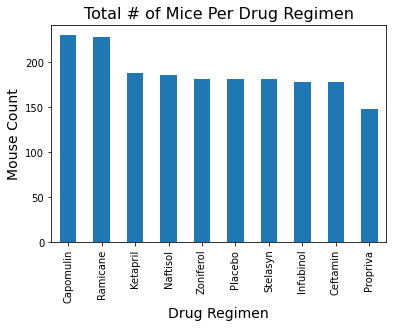

In [14]:
# Original Statement: Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Ask BCS told me I should be making a bar plot showing total # of mice per Drug Regimen


plt.title("Total # of Mice Per Drug Regimen",fontsize=16)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Mouse Count", fontsize=14)
#get the count of mice through value counts in the drug regimen
mouse_total_plt=clean_mouse_data["Drug Regimen"].value_counts()
mouse_total_plt.sort_values(ascending=True)

mouse_total_plt.plot(kind="bar", x="Drug Regimen", y= mouse_total_plt)
plt.show()

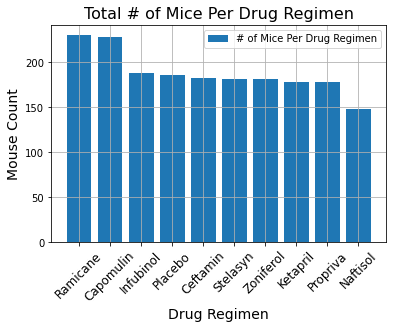

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#create x axis variable for Drug Regimens on x axis
regimen_list= clean_mouse_data['Drug Regimen'].unique()

plt.title("Total # of Mice Per Drug Regimen",fontsize=16)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Mouse Count", fontsize=14)
x_axis=np.arange(len(regimen_list))
plt.bar(x_axis, height=(mouse_total_plt), label="# of Mice Per Drug Regimen")
plt.xticks(x_axis,['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],rotation=45, fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


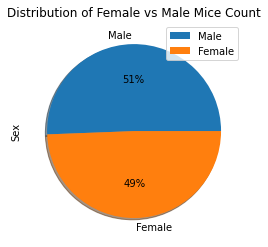

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data =mouse_trial_df['Sex'].value_counts()

gender_data.plot(kind='pie',autopct='%1.f%%',title='Distribution of Female vs Male Mice Count',shadow=True)
plt.legend()
plt.show()


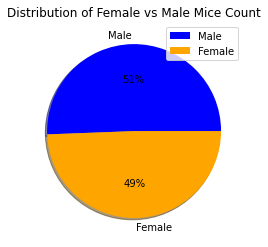

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels=["Male", "Female"]

values=gender_data =mouse_trial_df['Sex'].value_counts()
colors=["blue", "orange"]

plt.pie(values, labels=labels, colors=colors, autopct="%1.f%%", shadow=True)
plt.legend()
plt.title("Distribution of Female vs Male Mice Count")
plt.show()


In [18]:
# Create new data frame for # Capomulin, Ramicane, Infubinol, and Ceftamin
import numpy as np

last4_df=clean_mouse_data.set_index('Drug Regimen').loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],:].sort_values('Mouse ID')
last4_df.head(25)


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,Female,20,23,30,59.523197,1
Infubinol,a203,Female,20,23,20,55.173336,1
Infubinol,a203,Female,20,23,15,52.777870,1
Infubinol,a203,Female,20,23,10,51.852437,1
Infubinol,a203,Female,20,23,5,48.508468,0
Infubinol,a203,Female,20,23,0,45.000000,0
Infubinol,a203,Female,20,23,25,56.793208,1
Infubinol,a203,Female,20,23,35,61.931650,2
Infubinol,a203,Female,20,23,40,63.593490,2


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# From the dataframe off these last 4 drugs, isolate the mouse ID's for these drugs
last4_df
last4_mouseid=last4_df['Mouse ID'].unique()

# Start by getting the last (greatest) timepoint for each mouse 
#get the drug type per regimen
last_timepoint_list=[]
drug_type=[]

#will make new data frame utilzing data from for loop having the mouse ID, drug type, final tumor size

for i in last4_mouseid:
    max_timepoint=last4_df.loc[last4_df["Mouse ID"]==i].sort_values(by='Timepoint', ascending=False)
    
    last_tumor=round(max_timepoint.iloc[0,5],2)
    
    last_timepoint_list.append(last_tumor)
    drug_type.append(max_timepoint.reset_index().iloc[0,0])
    

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#create data frame from the for loop

last_tumor_df=pd.DataFrame({"Mouse ID": last4_mouseid, "Drug Regimen": drug_type,"Final Tumor Size": last_timepoint_list})
last_tumor_df.head(20)

,Mouse ID,Drug Regimen,Final Tumor Size
0,a203,Infubinol,67.97
1,a251,Infubinol,65.53
2,a275,Ceftamin,63.00
3,a411,Ramicane,38.41
4,a444,Ramicane,43.05
5,a520,Ramicane,38.81
6,a577,Infubinol,57.03
7,a644,Ramicane,32.98
8,a685,Infubinol,66.08
9,b128,Capomulin,38.98


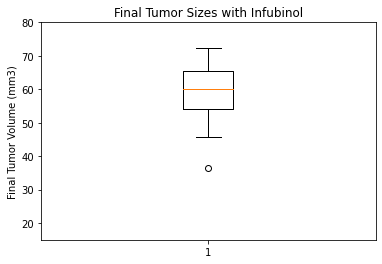

There are 1 outliers in the regimen for Infubinol regimen


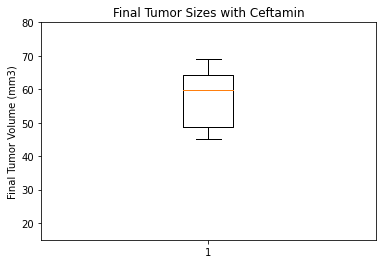

There are 0 outliers in the regimen for Ceftamin regimen


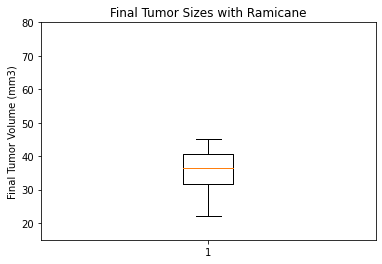

There are 0 outliers in the regimen for Ramicane regimen


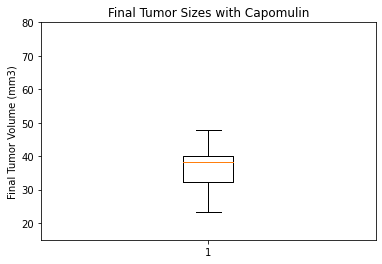

There are 0 outliers in the regimen for Capomulin regimen


In [27]:
# Put treatments into a list for for loop (and later for plot labels)

#sort by drug regimen
sorted_last_df=tumor=last_tumor_df.sort_values('Drug Regimen')

# (['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)
treatments=last_tumor_df['Drug Regimen'].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_df=pd.DataFrame({treatments[0]:[],treatments[1]:[], treatments[2]:[], treatments[3]:[]})
tumor_vol_df

tumor_vol_data=[]

for i in treatments:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    tumor_size_sorted=sorted_last_df.loc[sorted_last_df['Drug Regimen']==i].sort_values('Final Tumor Size')
    quartiles=tumor_size_sorted['Final Tumor Size'].quantile([.25,.5,.75])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # Determine outliers using upper and lower bounds
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    IQR=upperq-lowerq
    tumor_vol_data.append(tumor_size_sorted['Final Tumor Size'])
    outliers= tumor_size_sorted.loc[(tumor_size_sorted['Final Tumor Size']>1.5*IQR+upperq) | (tumor_size_sorted['Final Tumor Size']<lowerq-1.5*IQR)]
    
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest

    plt.boxplot(tumor_size_sorted['Final Tumor Size'])
    plt.title(f'Final Tumor Sizes with {i}')
    plt.ylim(15,80)
    plt.ylabel('Final Tumor Volume (mm3)')
    plt.show()
    print(f'There are {len(outliers)} outliers in the regimen for {i} regimen')


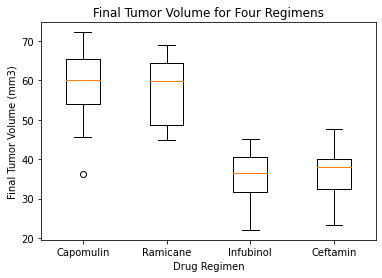

In [28]:
graph_data= tumor_vol_data
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Four Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(graph_data, labels=Regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

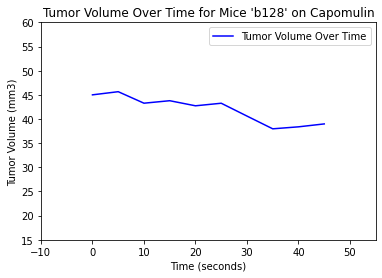

In [92]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_data=clean_mouse_data.set_index('Drug Regimen').loc['Capomulin',:].sort_values(['Mouse ID','Timepoint'])

cap_data
#using mouse ID b128 for this data
cap_b128=clean_mouse_data.loc[clean_mouse_data["Mouse ID"]=="b128"]

cap_b128
plt.title("Tumor Volume Over Time for Mice 'b128' on Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (seconds)")
plt.ylim(15,60)
plt.xlim(-10,55)
plt.plot(cap_b128["Timepoint"], cap_b128["Tumor Volume (mm3)"] ,color="blue", label="Tumor Volume Over Time")
plt.legend()
plt.show()

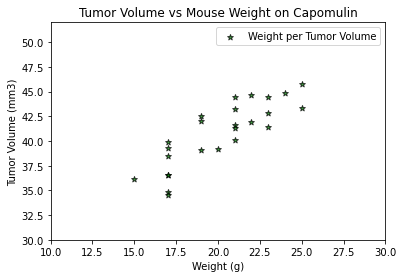

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data

#get the mean data for all the mouse IDs
avg_cap_data=cap_data.groupby("Mouse ID").mean()
# get averages for weight and tumor volume
x_axis=avg_cap_data["Weight (g)"]
y_axis=avg_cap_data["Tumor Volume (mm3)"]

#get the plot data
plt.title("Tumor Volume vs Mouse Weight on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,52)
plt.xlim(10,30)


plt.scatter(x_axis, y_axis, marker="*", facecolors="green", edgecolors="black",  alpha=0.75, label='Weight per Tumor Volume')
plt.plot()
plt.legend()
plt.show()


## Correlation and Regression

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_cap_data
correlation=st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}") 

The correlation between both factors is 0.84


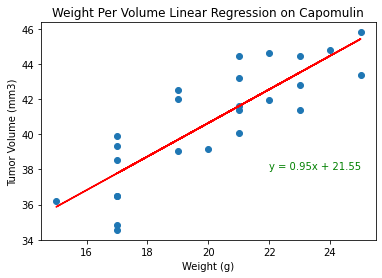

In [123]:
# Linear Regression Model
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

x_axis=avg_cap_data["Weight (g)"]
y_axis=avg_cap_data["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight Per Volume Linear Regression on Capomulin")
plt.annotate(line_eq,(22,38),fontsize=10,color="green")

plt.show()


In [ ]:
# 3 Observations
# 1 - Heavier the mouse, higher the tumor weight
#2 For the entirety of this data it was very consistant and there was only 1x outlier showing very little variations in the medication
#3 Capomulin has the most efficacy with decreasing tumor size